NBA選手の各スタッツ（スキル）に基づいた年俸の予測

In [1]:
# 数値計算に必要なライブラリ
import numpy as np
import pandas as pd
# グラフを描画するパッケージ
import matplotlib.pyplot as plt
import seaborn as sns
# 機械学習ライブラリscikit-learnの線形モデル
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
#AICやt検定を行うのに便利なライブラリ
from statsmodels import api as sm

In [2]:
#データの読み込み
nba_df = pd.read_csv('nba_stats_income.csv')

In [3]:
print("データセットのキー（特徴量名）の確認==>:\n", nba_df.keys())
print('dataframeの行数・列数の確認==>:\n', nba_df.shape)

データセットのキー（特徴量名）の確認==>:
 Index(['rank', 'Player', 'Age', 'GP', 'MIN', 'FG%', '3P%', 'FT%', 'ORB', 'DRB',
       'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Income'],
      dtype='object')
dataframeの行数・列数の確認==>:
 (50, 18)


In [4]:
print(nba_df)

    rank                 Player   Age     GP   MIN   FG%    3P%   FT%  ORB  \
0      1          Stephen Curry  31.0  112.0  37.8  40.8  40.10  90.6  0.8   
1      2     Russell Westbrook_  32.0  104.0  37.5  41.1  29.80  83.5  1.8   
2      3             Chris Paul  35.0  108.0  37.2  47.8  36.40  84.5  0.8   
3      4           James Harden  31.0  126.0  35.2  42.5  33.20  86.6  0.7   
4      5              John Wall  29.0   37.0  38.8  41.9  26.70  82.2  0.5   
5      6           LeBron James  35.0  260.0  41.6  49.6  33.50  74.1  1.5   
6      7           Kevin Durant  32.0  139.0  40.3  47.5  35.20  86.4  0.8   
7      8          Blake Griffin  31.0   53.0  35.3  49.0   3.61  73.0  2.2   
8      9             Kyle Lowry  33.0   86.0  34.7  41.9  34.50  79.2  0.8   
9     10            Paul George  30.0   88.0  38.7  42.1  35.90  82.1  1.0   
10    11          Klay Thompson  29.0  123.0  37.2  44.2  41.50  84.1  0.6   
11    12           Kemba Walker  30.0   25.0  37.7  42.0  33.10 

In [5]:
#欠損値を含む行の削除
nba_df=nba_df.dropna()
print(nba_df)

    rank                 Player   Age     GP   MIN   FG%    3P%   FT%  ORB  \
0      1          Stephen Curry  31.0  112.0  37.8  40.8  40.10  90.6  0.8   
1      2     Russell Westbrook_  32.0  104.0  37.5  41.1  29.80  83.5  1.8   
2      3             Chris Paul  35.0  108.0  37.2  47.8  36.40  84.5  0.8   
3      4           James Harden  31.0  126.0  35.2  42.5  33.20  86.6  0.7   
4      5              John Wall  29.0   37.0  38.8  41.9  26.70  82.2  0.5   
5      6           LeBron James  35.0  260.0  41.6  49.6  33.50  74.1  1.5   
6      7           Kevin Durant  32.0  139.0  40.3  47.5  35.20  86.4  0.8   
7      8          Blake Griffin  31.0   53.0  35.3  49.0   3.61  73.0  2.2   
8      9             Kyle Lowry  33.0   86.0  34.7  41.9  34.50  79.2  0.8   
9     10            Paul George  30.0   88.0  38.7  42.1  35.90  82.1  1.0   
10    11          Klay Thompson  29.0  123.0  37.2  44.2  41.50  84.1  0.6   
11    12           Kemba Walker  30.0   25.0  37.7  42.0  33.10 

In [6]:
#必要な説明変数だけに絞ってXに代入
X = nba_df.drop(["Income","Player","rank"],axis=1)
#目的変数だけをYに代入
Y = nba_df["Income"]

print(X)

     Age     GP   MIN   FG%    3P%   FT%  ORB   DRB   TRB  AST  STL  BLK  TOV  \
0   31.0  112.0  37.8  40.8  40.10  90.6  0.8   4.6   5.4  6.3  1.6  0.3  3.5   
1   32.0  104.0  37.5  41.1  29.80  83.5  1.8   5.2   7.1  7.8  1.8  0.3  4.0   
2   35.0  108.0  37.2  47.8  36.40  84.5  0.8   4.4   5.2  8.2  2.1  0.2  2.7   
3   31.0  126.0  35.2  42.5  33.20  86.6  0.7   4.7   5.4  5.8  1.7  0.5  3.4   
4   29.0   37.0  38.8  41.9  26.70  82.2  0.5   3.8   4.3  9.8  1.7  1.1  3.9   
5   35.0  260.0  41.6  49.6  33.50  74.1  1.5   7.5   9.0  7.2  1.7  1.0  3.7   
6   32.0  139.0  40.3  47.5  35.20  86.4  0.8   6.9   7.7  4.0  1.0  1.2  3.2   
7   31.0   53.0  35.3  49.0   3.61  73.0  2.2   6.3   8.5  4.0  1.1  0.9  2.5   
8   33.0   86.0  34.7  41.9  34.50  79.2  0.8   3.5   4.3  5.7  1.3  0.2  2.5   
9   30.0   88.0  38.7  42.1  35.90  82.1  1.0   6.1   7.1  3.9  1.6  0.5  3.0   
10  29.0  123.0  37.2  44.2  41.50  84.1  0.6   3.4   4.0  2.2  1.0  0.5  1.8   
11  30.0   25.0  37.7  42.0 

In [7]:
model = sm.OLS(Y,X)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Income   R-squared (uncentered):                   0.992
Model:                            OLS   Adj. R-squared (uncentered):              0.988
Method:                 Least Squares   F-statistic:                              234.2
Date:                Sun, 22 Nov 2020   Prob (F-statistic):                    1.39e-24
Time:                        15:04:59   Log-Likelihood:                         -104.27
No. Observations:                  42   AIC:                                      238.5
Df Residuals:                      27   BIC:                                      264.6
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Age            0.1709      0.313      0.545      0.590      -0.472       0.814
GP             0.0366      0.019      1.884      0.070      -0.003       0.076
MIN            0.1160      0.299      0.388      0.701      -0.497       0.729
FG%            0.2272      0.141      1.616      0.118      -0.061       0.516
3P%           -0.1240      0.096     -1.287      0.209      -0.322       0.074
FT%            0.1709      0.101      1.686      0.103      -0.037       0.379
ORB           -1.9411     24.261     -0.080      0.937     -51.721      47.839
DRB           -1.9957     23.567     -0.085      0.933     -50.351      46.360
TRB            1.8733     23.686      0.079      0.938     -46.726      50.473
AST            0.2501      0.545      0.459      0.650      -0.869       1.369
STL           -1.3714      2.024     -0.677      0.504      -5.525       2.782
BLK           -2.8906      1.926     -1.501      0.145      -6.843       1.062
TOV            3.7287      1.972      1.891      0.069      -0.318       7.775
PF            -0.3092      1.523     -0.203      0.841      -3.435       2.817
PTS           -0.1584      0.243     -0.651      0.521      -0.658       0.341
==============================================================================
Omnibus:                        0.478   Durbin-Watson:                   1.436
Prob(Omnibus):                  0.788   Jarque-Bera (JB):                0.594
Skew:                          -0.218   Prob(JB):                        0.743
Kurtosis:                       2.612   Cond. No.                     9.59e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

説明変数を絞らずに重回帰分析を行った結果が上記であり、これから決定係数の値を大きくするために説明変数を減らしていくことを考える。

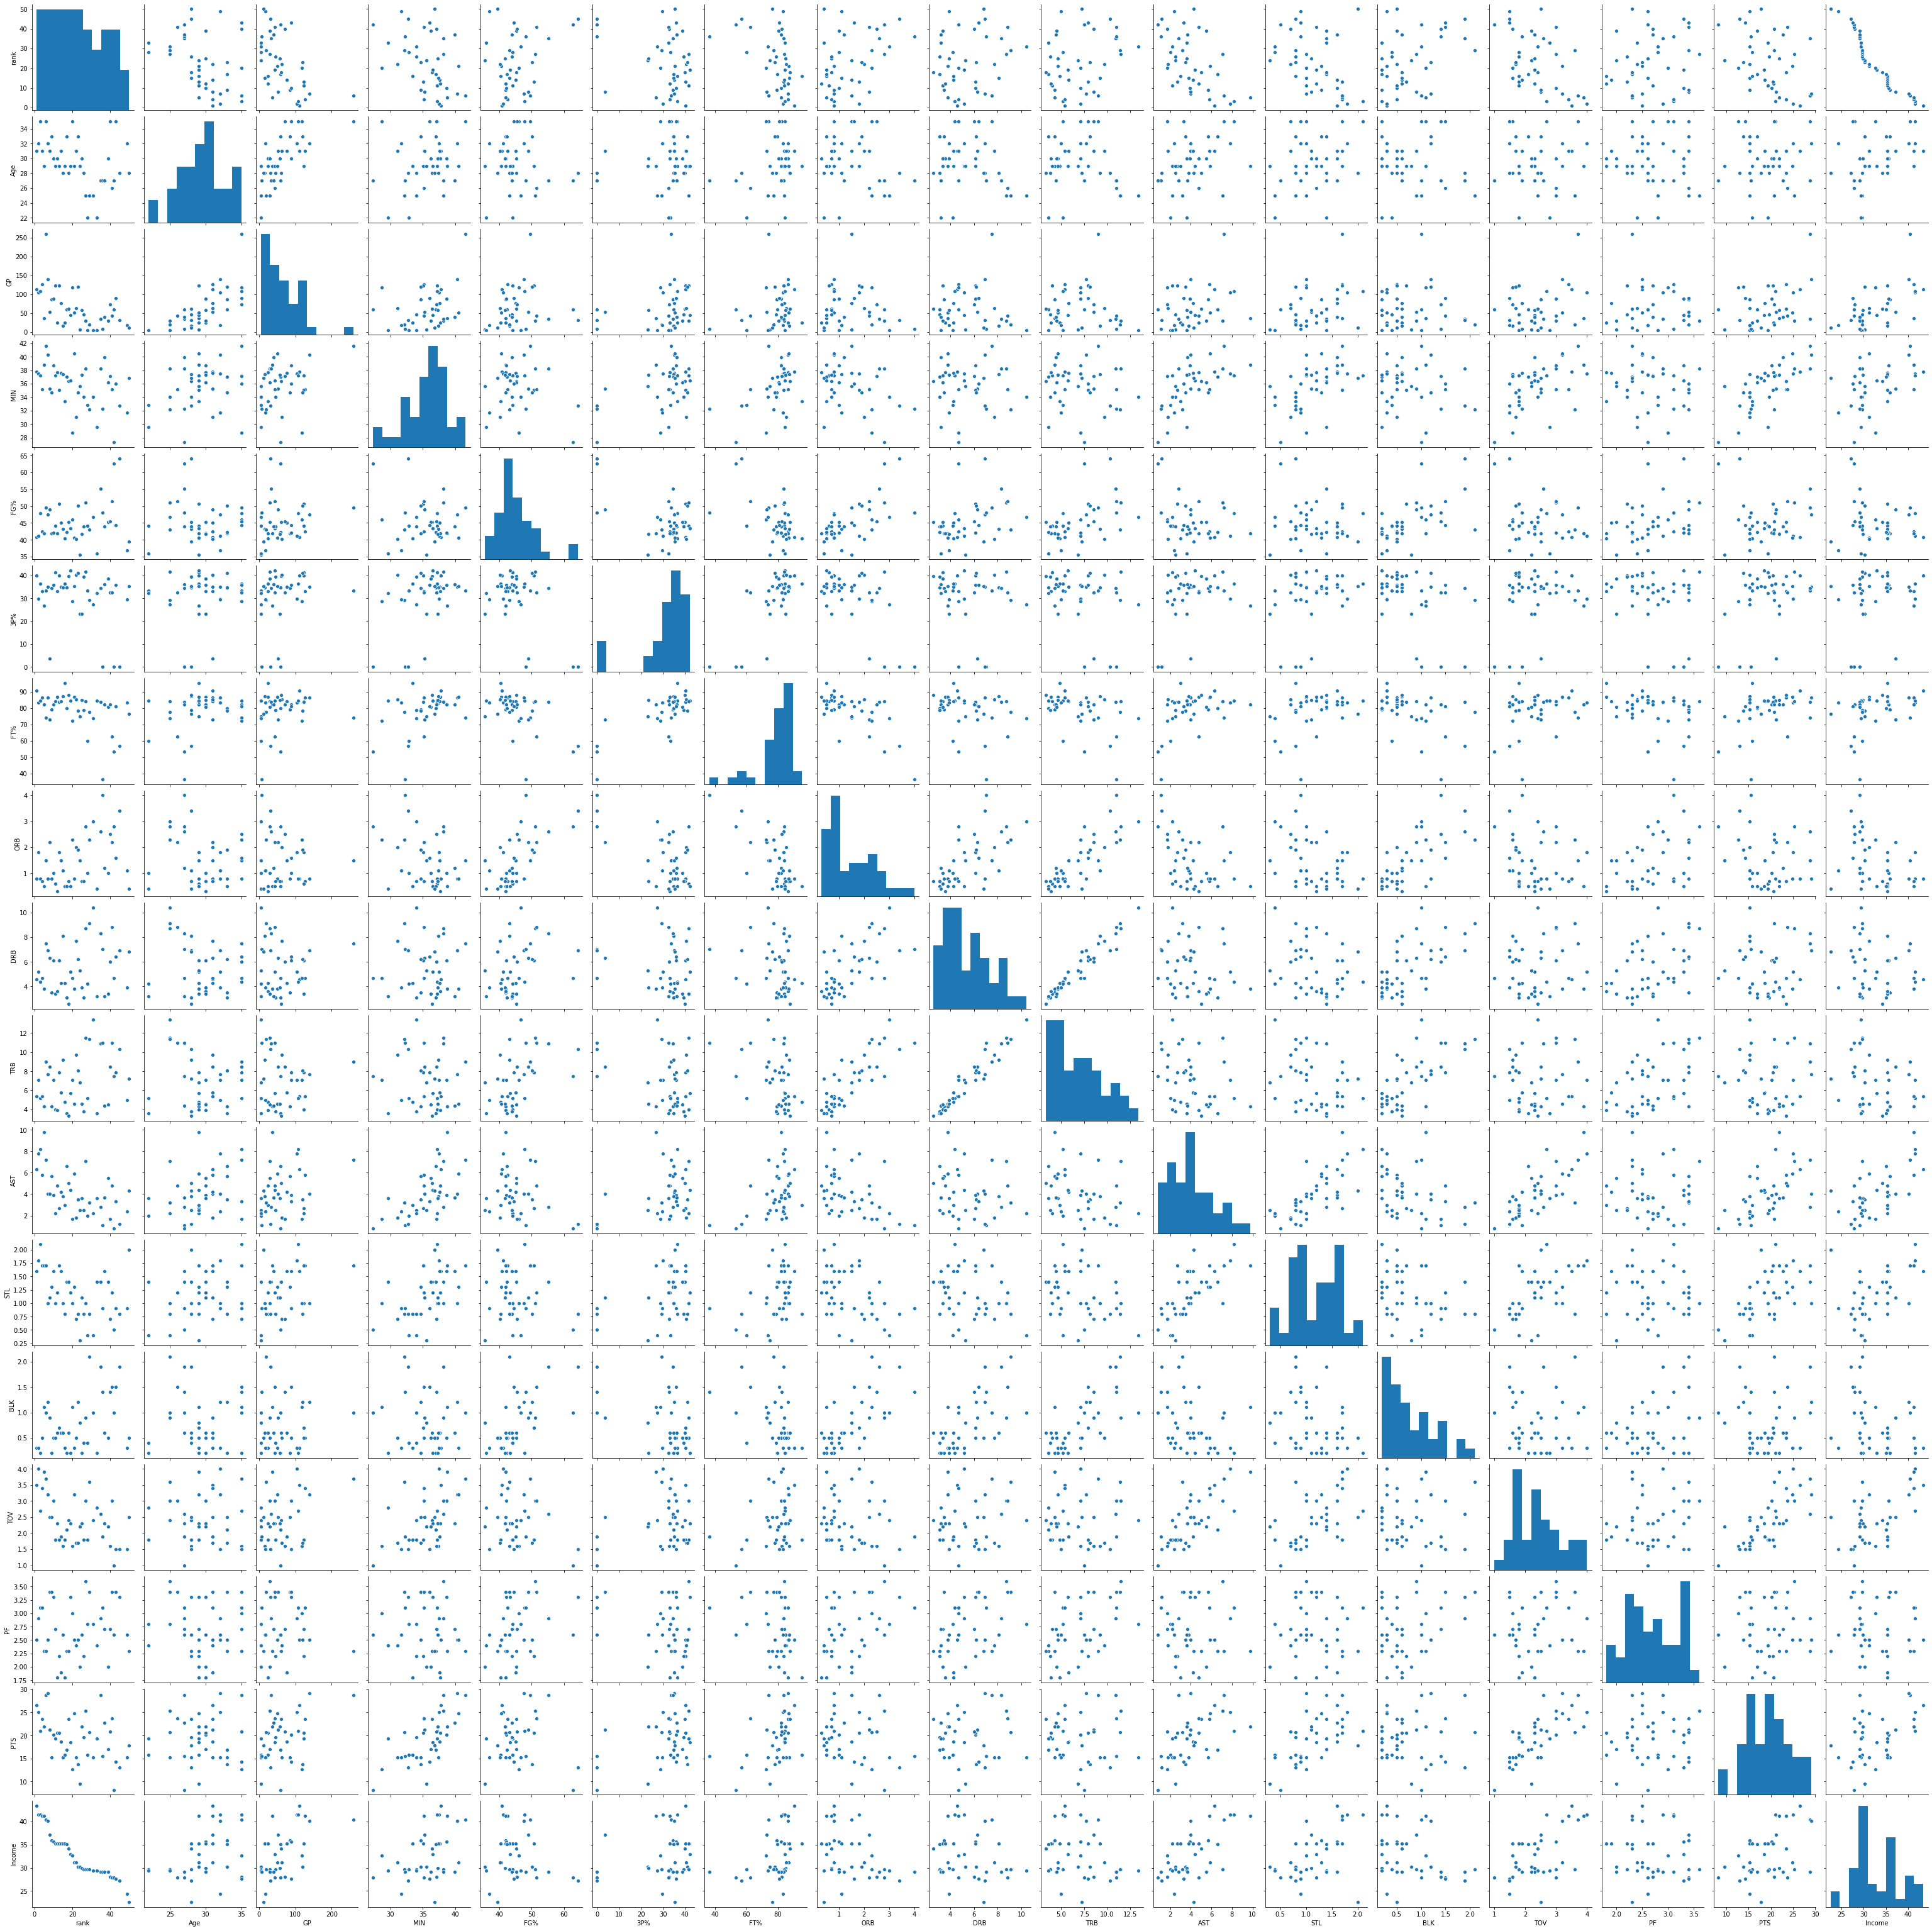

In [8]:
#散布図行列を表示
sns.pairplot(nba_df)
plt.show()

散布図を見てわかるのはDRBとTRBの相関の強さだけであり、これらは一つにまとめることができそうだと言える。

In [9]:
# 相関を計算
corr = nba_df.corr()

# データフレームに色をつける
corr.style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,rank,Age,GP,MIN,FG%,3P%,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Income
rank,1.0,-0.34,-0.54,-0.4,0.23,-0.27,-0.44,0.4,0.21,0.29,-0.56,-0.4,0.38,-0.49,0.1,-0.4,-0.95
Age,-0.34,1.0,0.66,0.26,-0.066,0.14,0.27,-0.13,-0.17,-0.17,0.25,0.26,-0.082,-0.037,-0.043,0.03,0.39
GP,-0.54,0.66,1.0,0.34,0.17,0.24,0.19,-0.1,-0.029,-0.057,0.3,0.38,-0.025,0.26,0.013,0.38,0.59
MIN,-0.4,0.26,0.34,1.0,-0.14,0.41,0.45,-0.35,-0.0048,-0.13,0.6,0.51,-0.11,0.52,-0.11,0.69,0.42
FG%,0.23,-0.066,0.17,-0.14,1.0,-0.46,-0.52,0.65,0.37,0.49,-0.23,-0.14,0.59,-0.24,0.32,-0.031,-0.13
3P%,-0.27,0.14,0.24,0.41,-0.46,1.0,0.74,-0.58,-0.15,-0.31,0.34,0.31,-0.39,0.19,-0.23,0.36,0.19
FT%,-0.44,0.27,0.19,0.45,-0.52,0.74,1.0,-0.66,-0.26,-0.42,0.41,0.36,-0.44,0.27,-0.32,0.41,0.38
ORB,0.4,-0.13,-0.1,-0.35,0.65,-0.58,-0.66,1.0,0.65,0.83,-0.44,-0.42,0.71,-0.22,0.44,-0.21,-0.35
DRB,0.21,-0.17,-0.029,-0.0048,0.37,-0.15,-0.26,0.65,1.0,0.96,-0.19,-0.25,0.64,0.13,0.43,0.085,-0.19
TRB,0.29,-0.17,-0.057,-0.13,0.49,-0.31,-0.42,0.83,0.96,1.0,-0.29,-0.32,0.72,0.018,0.47,-0.0088,-0.26


多重共線性を確認するために相関係数を見ると、目的変数と相関の強い変数がわかる。
また、ORBとDRBがTRBと非常に相関が強いので以後はTRBだけに絞ることにする。

In [48]:
#必要な説明変数だけに絞ってXに代入
X_processed = nba_df_processed.drop(["Income","Player"],axis=1)
#目的変数だけをYに代入
Y_processed = nba_df_processed["Income"]
#外れ値処理後の回帰分析
model = sm.OLS(Y_processed,X_processed)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Income   R-squared (uncentered):                   0.994
Model:                            OLS   Adj. R-squared (uncentered):              0.991
Method:                 Least Squares   F-statistic:                              271.1
Date:                Sun, 22 Nov 2020   Prob (F-statistic):                    3.22e-22
Time:                        16:22:58   Log-Likelihood:                         -88.843
No. Observations:                  38   AIC:                                      207.7
Df Residuals:                      23   BIC:                                      232.3
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Age           -0.1875      0.305     -0.614      0.545      -0.819       0.444
GP             0.0586      0.019      3.107      0.005       0.020       0.098
MIN           -0.0939      0.281     -0.334      0.742      -0.676       0.488
FG%            0.4940      0.221      2.238      0.035       0.037       0.950
3P%           -0.1800      0.156     -1.152      0.261      -0.503       0.143
FT%            0.3321      0.109      3.034      0.006       0.106       0.559
ORB          -11.1629     23.657     -0.472      0.641     -60.102      37.776
DRB           -9.5381     22.878     -0.417      0.681     -56.865      37.789
TRB            9.4831     23.028      0.412      0.684     -38.155      57.121
AST            0.6006      0.526      1.143      0.265      -0.487       1.688
STL           -2.5360      1.881     -1.348      0.191      -6.428       1.356
BLK           -1.9257      1.968     -0.979      0.338      -5.996       2.145
TOV            3.5933      1.942      1.850      0.077      -0.425       7.612
PF            -0.4095      1.459     -0.281      0.781      -3.427       2.608
PTS           -0.3989      0.239     -1.667      0.109      -0.894       0.096
==============================================================================
Omnibus:                        1.252   Durbin-Watson:                   1.858
Prob(Omnibus):                  0.535   Jarque-Bera (JB):                1.241
Skew:                          -0.354   Prob(JB):                        0.538
Kurtosis:                       2.468   Cond. No.                     1.02e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
# 目的変数と相関の強い説明変数だけにして変数Xに格納
X = nba_df_processed[["AST","GP","TOV","STL","PTS","MIN","Age"]]
Y = Y_processed
print(X)

      AST     GP  TOV  STL   PTS   MIN   Age
rank                                        
1     6.3  112.0  3.5  1.6  26.5  37.8  31.0
2     7.8  104.0  4.0  1.8  25.0  37.5  32.0
3     8.2  108.0  2.7  2.1  21.0  37.2  35.0
4     5.8  126.0  3.4  1.7  23.5  35.2  31.0
5     9.8   37.0  3.9  1.7  21.9  38.8  29.0
6     7.2  260.0  3.7  1.7  28.8  41.6  35.0
7     4.0  139.0  3.2  1.0  29.1  40.3  32.0
9     5.7   86.0  2.5  1.3  15.2  34.7  33.0
10    3.9   88.0  3.0  1.6  20.2  38.7  30.0
11    2.2  123.0  1.8  1.0  19.3  37.2  29.0
12    4.8   25.0  2.3  1.2  20.6  37.7  30.0
13    2.7  123.0  1.8  1.7  20.5  35.1  29.0
14    4.2   76.0  1.9  1.6  18.7  37.6  31.0
15    3.8   16.0  1.6  1.0  15.3  37.4  28.0
16    3.0   24.0  1.8  0.8  15.8  33.4  29.0
17    6.6   60.0  2.1  1.4  16.9  37.0  33.0
18    5.0   61.0  2.4  1.4  23.5  36.4  28.0
19    4.4   44.0  2.3  1.2  18.5  36.5  29.0
20    1.7  118.0  1.6  1.0  12.7  28.7  35.0
21    5.9   51.0  3.2  1.3  24.8  40.5  29.0
22    1.8 

In [51]:
model = sm.OLS(Y,X)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Income   R-squared (uncentered):                   0.989
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                              386.9
Date:                Sun, 22 Nov 2020   Prob (F-statistic):                    2.45e-28
Time:                        16:24:18   Log-Likelihood:                         -102.13
No. Observations:                  38   AIC:                                      218.3
Df Residuals:                      31   BIC:                                      229.7
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AST            0.4493      0.549      0.818      0.420      -0.671       1.569
GP             0.0264      0.017      1.541      0.134      -0.009       0.061
TOV            2.6914      1.555      1.731      0.093      -0.479       5.862
STL           -0.1684      2.126     -0.079      0.937      -4.504       4.167
PTS           -0.1125      0.254     -0.443      0.661      -0.631       0.406
MIN            0.3738      0.257      1.453      0.156      -0.151       0.898
Age            0.3940      0.236      1.670      0.105      -0.087       0.875
==============================================================================
Omnibus:                        1.340   Durbin-Watson:                   1.137
Prob(Omnibus):                  0.512   Jarque-Bera (JB):                1.312
Skew:                          -0.366   Prob(JB):                        0.519
Kurtosis:                       2.460   Cond. No.                         320.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

目的変数と相関の強い説明変数のみで重回帰分析を行った結果が上の図である。

In [61]:
# 目的変数と相関の低い説明変数を削除して変数Xに格納
X = nba_df_processed.drop(["Income","Player","PF"],axis=1)
print(X)

       Age     GP   MIN   FG%   3P%   FT%  ORB   DRB   TRB  AST  STL  BLK  \
rank                                                                        
1     31.0  112.0  37.8  40.8  40.1  90.6  0.8   4.6   5.4  6.3  1.6  0.3   
2     32.0  104.0  37.5  41.1  29.8  83.5  1.8   5.2   7.1  7.8  1.8  0.3   
3     35.0  108.0  37.2  47.8  36.4  84.5  0.8   4.4   5.2  8.2  2.1  0.2   
4     31.0  126.0  35.2  42.5  33.2  86.6  0.7   4.7   5.4  5.8  1.7  0.5   
5     29.0   37.0  38.8  41.9  26.7  82.2  0.5   3.8   4.3  9.8  1.7  1.1   
6     35.0  260.0  41.6  49.6  33.5  74.1  1.5   7.5   9.0  7.2  1.7  1.0   
7     32.0  139.0  40.3  47.5  35.2  86.4  0.8   6.9   7.7  4.0  1.0  1.2   
9     33.0   86.0  34.7  41.9  34.5  79.2  0.8   3.5   4.3  5.7  1.3  0.2   
10    30.0   88.0  38.7  42.1  35.9  82.1  1.0   6.1   7.1  3.9  1.6  0.5   
11    29.0  123.0  37.2  44.2  41.5  84.1  0.6   3.4   4.0  2.2  1.0  0.5   
12    30.0   25.0  37.7  42.0  33.1  86.7  0.3   3.6   3.9  4.8  1.2  0.6   

In [62]:
model = sm.OLS(Y,X)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Income   R-squared (uncentered):                   0.994
Model:                            OLS   Adj. R-squared (uncentered):              0.991
Method:                 Least Squares   F-statistic:                              302.1
Date:                Sun, 22 Nov 2020   Prob (F-statistic):                    1.88e-23
Time:                        16:42:29   Log-Likelihood:                         -88.908
No. Observations:                  38   AIC:                                      205.8
Df Residuals:                      24   BIC:                                      228.7
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Age           -0.2217      0.274     -0.808      0.427      -0.788       0.345
GP             0.0605      0.017      3.513      0.002       0.025       0.096
MIN           -0.0722      0.265     -0.272      0.788      -0.620       0.476
FG%            0.4737      0.205      2.316      0.029       0.052       0.896
3P%           -0.1900      0.149     -1.273      0.215      -0.498       0.118
FT%            0.3409      0.103      3.315      0.003       0.129       0.553
ORB          -13.9232     21.100     -0.660      0.516     -57.471      29.625
DRB          -12.1994     20.418     -0.597      0.556     -54.339      29.940
TRB           12.1485     20.573      0.591      0.560     -30.312      54.609
AST            0.6386      0.498      1.282      0.212      -0.389       1.666
STL           -2.5616      1.843     -1.390      0.177      -6.365       1.242
BLK           -1.7647      1.846     -0.956      0.349      -5.574       2.045
TOV            3.3057      1.618      2.043      0.052      -0.034       6.646
PTS           -0.3946      0.234     -1.685      0.105      -0.878       0.089
==============================================================================
Omnibus:                        1.179   Durbin-Watson:                   1.891
Prob(Omnibus):                  0.555   Jarque-Bera (JB):                1.177
Skew:                          -0.334   Prob(JB):                        0.555
Kurtosis:                       2.454   Cond. No.                     9.28e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

目的変数と相関の弱い説明変数を除いた時の結果が上記のようになり、AICはさっきより少し上がってしまった。

In [14]:
print(nba_df)

    rank                 Player   Age     GP   MIN   FG%    3P%   FT%  ORB  \
0      1          Stephen Curry  31.0  112.0  37.8  40.8  40.10  90.6  0.8   
1      2     Russell Westbrook_  32.0  104.0  37.5  41.1  29.80  83.5  1.8   
2      3             Chris Paul  35.0  108.0  37.2  47.8  36.40  84.5  0.8   
3      4           James Harden  31.0  126.0  35.2  42.5  33.20  86.6  0.7   
4      5              John Wall  29.0   37.0  38.8  41.9  26.70  82.2  0.5   
5      6           LeBron James  35.0  260.0  41.6  49.6  33.50  74.1  1.5   
6      7           Kevin Durant  32.0  139.0  40.3  47.5  35.20  86.4  0.8   
7      8          Blake Griffin  31.0   53.0  35.3  49.0   3.61  73.0  2.2   
8      9             Kyle Lowry  33.0   86.0  34.7  41.9  34.50  79.2  0.8   
9     10            Paul George  30.0   88.0  38.7  42.1  35.90  82.1  1.0   
10    11          Klay Thompson  29.0  123.0  37.2  44.2  41.50  84.1  0.6   
11    12           Kemba Walker  30.0   25.0  37.7  42.0  33.10 

In [65]:
#リマインダーとして
# 目的変数のみ削除して変数Xに格納
X = nba_df_processed.drop(["Income","Player","PF"],axis=1)
# 目的変数のみ抽出して変数Yに格納
Y = nba_df_processed["Income"]
print(X)
print(Y)

       Age     GP   MIN   FG%   3P%   FT%  ORB   DRB   TRB  AST  STL  BLK  \
rank                                                                        
1     31.0  112.0  37.8  40.8  40.1  90.6  0.8   4.6   5.4  6.3  1.6  0.3   
2     32.0  104.0  37.5  41.1  29.8  83.5  1.8   5.2   7.1  7.8  1.8  0.3   
3     35.0  108.0  37.2  47.8  36.4  84.5  0.8   4.4   5.2  8.2  2.1  0.2   
4     31.0  126.0  35.2  42.5  33.2  86.6  0.7   4.7   5.4  5.8  1.7  0.5   
5     29.0   37.0  38.8  41.9  26.7  82.2  0.5   3.8   4.3  9.8  1.7  1.1   
6     35.0  260.0  41.6  49.6  33.5  74.1  1.5   7.5   9.0  7.2  1.7  1.0   
7     32.0  139.0  40.3  47.5  35.2  86.4  0.8   6.9   7.7  4.0  1.0  1.2   
9     33.0   86.0  34.7  41.9  34.5  79.2  0.8   3.5   4.3  5.7  1.3  0.2   
10    30.0   88.0  38.7  42.1  35.9  82.1  1.0   6.1   7.1  3.9  1.6  0.5   
11    29.0  123.0  37.2  44.2  41.5  84.1  0.6   3.4   4.0  2.2  1.0  0.5   
12    30.0   25.0  37.7  42.0  33.1  86.7  0.3   3.6   3.9  4.8  1.2  0.6   

In [66]:
model = sm.OLS(Y,X)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Income   R-squared (uncentered):                   0.994
Model:                            OLS   Adj. R-squared (uncentered):              0.991
Method:                 Least Squares   F-statistic:                              302.1
Date:                Sun, 22 Nov 2020   Prob (F-statistic):                    1.88e-23
Time:                        16:53:51   Log-Likelihood:                         -88.908
No. Observations:                  38   AIC:                                      205.8
Df Residuals:                      24   BIC:                                      228.7
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Age           -0.2217      0.274     -0.808      0.427      -0.788       0.345
GP             0.0605      0.017      3.513      0.002       0.025       0.096
MIN           -0.0722      0.265     -0.272      0.788      -0.620       0.476
FG%            0.4737      0.205      2.316      0.029       0.052       0.896
3P%           -0.1900      0.149     -1.273      0.215      -0.498       0.118
FT%            0.3409      0.103      3.315      0.003       0.129       0.553
ORB          -13.9232     21.100     -0.660      0.516     -57.471      29.625
DRB          -12.1994     20.418     -0.597      0.556     -54.339      29.940
TRB           12.1485     20.573      0.591      0.560     -30.312      54.609
AST            0.6386      0.498      1.282      0.212      -0.389       1.666
STL           -2.5616      1.843     -1.390      0.177      -6.365       1.242
BLK           -1.7647      1.846     -0.956      0.349      -5.574       2.045
TOV            3.3057      1.618      2.043      0.052      -0.034       6.646
PTS           -0.3946      0.234     -1.685      0.105      -0.878       0.089
==============================================================================
Omnibus:                        1.179   Durbin-Watson:                   1.891
Prob(Omnibus):                  0.555   Jarque-Bera (JB):                1.177
Skew:                          -0.334   Prob(JB):                        0.555
Kurtosis:                       2.454   Cond. No.                     9.28e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

帰無仮説を回帰係数=0とした時に有意水準0.05でt検定を行うと、FT%,GP以外は棄却できないという結果になった。
しかし、これは棄却できないというだけであり各説明変数の説明力のなさを表しているわけではない。
ゆえに、p値が大きい説明変数を削除してもう一度重回帰分析を行ってみることにする。

In [69]:
# p値が大きい説明変数を削除して変数Xに格納
X = nba_df_processed.drop(["Income","Player","MIN","TRB","ORB","DRB","Age","PF"],axis=1)
# 目的変数のみ抽出して変数Yに格納
Y = nba_df_processed["Income"]
print(X)
print(Y)

         GP   FG%   3P%   FT%  AST  STL  BLK  TOV   PTS
rank                                                   
1     112.0  40.8  40.1  90.6  6.3  1.6  0.3  3.5  26.5
2     104.0  41.1  29.8  83.5  7.8  1.8  0.3  4.0  25.0
3     108.0  47.8  36.4  84.5  8.2  2.1  0.2  2.7  21.0
4     126.0  42.5  33.2  86.6  5.8  1.7  0.5  3.4  23.5
5      37.0  41.9  26.7  82.2  9.8  1.7  1.1  3.9  21.9
6     260.0  49.6  33.5  74.1  7.2  1.7  1.0  3.7  28.8
7     139.0  47.5  35.2  86.4  4.0  1.0  1.2  3.2  29.1
9      86.0  41.9  34.5  79.2  5.7  1.3  0.2  2.5  15.2
10     88.0  42.1  35.9  82.1  3.9  1.6  0.5  3.0  20.2
11    123.0  44.2  41.5  84.1  2.2  1.0  0.5  1.8  19.3
12     25.0  42.0  33.1  86.7  4.8  1.2  0.6  2.3  20.6
13    123.0  50.7  40.1  83.9  2.7  1.7  0.7  1.8  20.5
14     76.0  45.1  35.0  84.1  4.2  1.6  0.6  1.9  18.7
15     16.0  43.2  34.7  87.2  3.8  1.0  0.6  1.6  15.3
16     24.0  40.5  36.5  95.5  3.0  0.8  0.3  1.8  15.8
17     60.0  42.3  34.9  79.8  6.6  1.4  0.2  2.

In [70]:
model = sm.OLS(Y,X)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Income   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.991
Method:                 Least Squares   F-statistic:                              492.2
Date:                Sun, 22 Nov 2020   Prob (F-statistic):                    3.15e-29
Time:                        17:14:59   Log-Likelihood:                         -91.607
No. Observations:                  38   AIC:                                      201.2
Df Residuals:                      29   BIC:                                      216.0
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
GP             0.0499      0.011      4.500      0.000       0.027       0.073
FG%            0.2755      0.138      1.996      0.055      -0.007       0.558
3P%           -0.1286      0.136     -0.949      0.351      -0.406       0.149
FT%            0.2662      0.060      4.438      0.000       0.144       0.389
AST            0.5824      0.451      1.292      0.206      -0.339       1.504
STL           -1.8865      1.734     -1.088      0.286      -5.433       1.660
BLK           -3.1280      1.528     -2.047      0.050      -6.253      -0.003
TOV            3.2324      1.332      2.426      0.022       0.507       5.957
PTS           -0.2777      0.181     -1.538      0.135      -0.647       0.092
==============================================================================
Omnibus:                        1.280   Durbin-Watson:                   1.685
Prob(Omnibus):                  0.527   Jarque-Bera (JB):                1.228
Skew:                          -0.319   Prob(JB):                        0.541
Kurtosis:                       2.393   Cond. No.                         450.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

帰無仮説を回帰係数=0とした時に有意水準0.05でt検定を行うと、GP,MINは棄却できることがわかった。AICはより小さくなったことがわかる。
次はp値の大きいSTL,PFを削除してみることにする。

In [71]:
# p値が大きい説明変数を削除して変数Xに格納
X = X.drop(["STL","3P%"],axis=1)
print(X)

         GP   FG%   FT%  AST  BLK  TOV   PTS
rank                                        
1     112.0  40.8  90.6  6.3  0.3  3.5  26.5
2     104.0  41.1  83.5  7.8  0.3  4.0  25.0
3     108.0  47.8  84.5  8.2  0.2  2.7  21.0
4     126.0  42.5  86.6  5.8  0.5  3.4  23.5
5      37.0  41.9  82.2  9.8  1.1  3.9  21.9
6     260.0  49.6  74.1  7.2  1.0  3.7  28.8
7     139.0  47.5  86.4  4.0  1.2  3.2  29.1
9      86.0  41.9  79.2  5.7  0.2  2.5  15.2
10     88.0  42.1  82.1  3.9  0.5  3.0  20.2
11    123.0  44.2  84.1  2.2  0.5  1.8  19.3
12     25.0  42.0  86.7  4.8  0.6  2.3  20.6
13    123.0  50.7  83.9  2.7  0.7  1.8  20.5
14     76.0  45.1  84.1  4.2  0.6  1.9  18.7
15     16.0  43.2  87.2  3.8  0.6  1.6  15.3
16     24.0  40.5  95.5  3.0  0.3  1.8  15.8
17     60.0  42.3  79.8  6.6  0.2  2.1  16.9
18     61.0  45.3  87.9  5.0  0.6  2.4  23.5
19     44.0  43.4  84.4  4.4  0.2  2.3  18.5
20    118.0  46.0  72.4  1.7  1.1  1.6  12.7
21     51.0  40.6  87.0  5.9  0.3  3.2  24.8
22     63.

In [72]:
model = sm.OLS(Y,X)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Income   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.991
Method:                 Least Squares   F-statistic:                              629.2
Date:                Sun, 22 Nov 2020   Prob (F-statistic):                    1.41e-31
Time:                        17:23:48   Log-Likelihood:                         -92.973
No. Observations:                  38   AIC:                                      199.9
Df Residuals:                      31   BIC:                                      211.4
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
GP             0.0467      0.011      4.295      0.000       0.025       0.069
FG%            0.2019      0.117      1.730      0.094      -0.036       0.440
FT%            0.2361      0.055      4.327      0.000       0.125       0.347
AST            0.3622      0.407      0.891      0.380      -0.467       1.191
BLK           -2.3434      1.426     -1.644      0.110      -5.251       0.564
TOV            3.5944      1.304      2.757      0.010       0.936       6.253
PTS           -0.3440      0.174     -1.972      0.058      -0.700       0.012
==============================================================================
Omnibus:                        0.751   Durbin-Watson:                   1.661
Prob(Omnibus):                  0.687   Jarque-Bera (JB):                0.587
Skew:                          -0.294   Prob(JB):                        0.746
Kurtosis:                       2.846   Cond. No.                         388.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

帰無仮説を回帰係数=0とした時に有意水準0.05でt検定を行うと、GP,MIN,3P%,FT%は棄却できることがわかった。AICはより小さくなったことがわかる。 次はp値の大きいASTを削除してみることにする。

In [73]:
# p値が大きい説明変数を削除して変数Xに格納
X = X.drop(["AST"],axis=1)
print(X)

         GP   FG%   FT%  BLK  TOV   PTS
rank                                   
1     112.0  40.8  90.6  0.3  3.5  26.5
2     104.0  41.1  83.5  0.3  4.0  25.0
3     108.0  47.8  84.5  0.2  2.7  21.0
4     126.0  42.5  86.6  0.5  3.4  23.5
5      37.0  41.9  82.2  1.1  3.9  21.9
6     260.0  49.6  74.1  1.0  3.7  28.8
7     139.0  47.5  86.4  1.2  3.2  29.1
9      86.0  41.9  79.2  0.2  2.5  15.2
10     88.0  42.1  82.1  0.5  3.0  20.2
11    123.0  44.2  84.1  0.5  1.8  19.3
12     25.0  42.0  86.7  0.6  2.3  20.6
13    123.0  50.7  83.9  0.7  1.8  20.5
14     76.0  45.1  84.1  0.6  1.9  18.7
15     16.0  43.2  87.2  0.6  1.6  15.3
16     24.0  40.5  95.5  0.3  1.8  15.8
17     60.0  42.3  79.8  0.2  2.1  16.9
18     61.0  45.3  87.9  0.6  2.4  23.5
19     44.0  43.4  84.4  0.2  2.3  18.5
20    118.0  46.0  72.4  1.1  1.6  12.7
21     51.0  40.6  87.0  0.3  3.2  24.8
22     63.0  40.3  85.4  0.5  1.7  15.3
23    120.0  50.1  78.3  1.2  1.7  13.8
24      6.0  35.6  75.0  0.8  2.2   9.5


In [74]:
model = sm.OLS(Y,X)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Income   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.991
Method:                 Least Squares   F-statistic:                              738.7
Date:                Sun, 22 Nov 2020   Prob (F-statistic):                    7.33e-33
Time:                        17:24:14   Log-Likelihood:                         -93.453
No. Observations:                  38   AIC:                                      198.9
Df Residuals:                      32   BIC:                                      208.7
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
GP             0.0478      0.011      4.437      0.000       0.026       0.070
FG%            0.2228      0.114      1.955      0.059      -0.009       0.455
FT%            0.2292      0.054      4.258      0.000       0.120       0.339
BLK           -2.8942      1.281     -2.260      0.031      -5.503      -0.286
TOV            4.3634      0.974      4.481      0.000       2.380       6.347
PTS           -0.3620      0.173     -2.096      0.044      -0.714      -0.010
==============================================================================
Omnibus:                        0.226   Durbin-Watson:                   1.566
Prob(Omnibus):                  0.893   Jarque-Bera (JB):                0.182
Skew:                          -0.149   Prob(JB):                        0.913
Kurtosis:                       2.837   Cond. No.                         310.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

↑暫定最適

In [77]:
pred = result.predict(X)
X.assign(Income=Y,prediction=pred)

,GP,FG%,FT%,BLK,TOV,PTS,Income,prediction
rank,,,,,,,,
1,112.0,40.8,90.6,0.3,3.5,26.5,43.4,40.014385
2,104.0,41.1,83.5,0.3,4.0,25.0,41.5,40.796477
3,108.0,47.8,84.5,0.2,2.7,21.0,41.5,38.774175
4,126.0,42.5,86.6,0.5,3.4,23.5,41.2,40.215936
5,37.0,41.9,82.2,1.1,3.9,21.9,41.2,35.846512
6,260.0,49.6,74.1,1.0,3.7,28.8,40.4,43.277276
7,139.0,47.5,86.4,1.2,3.2,29.1,40.1,36.979003
9,86.0,41.9,79.2,0.2,2.5,15.2,35.9,36.421191
10,88.0,42.1,82.1,0.5,3.0,20.2,35.6,36.729365


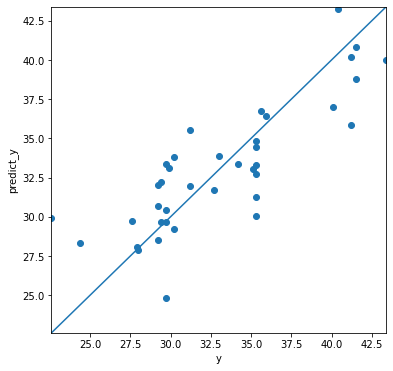

In [76]:
# グラフエリアを設定し、散布図を描く。
plt.figure(figsize=(6, 6))
plt.scatter(Y, pred)

# yの最大値、最小値を計算する。
y_max = np.max(Y)
y_min = np.min(Y)

# predict_yの最大値、最小値を計算する。
predict_y_max = np.max(pred)
predict_y_min = np.min(pred)

# 全てのプロットが収まるようにするには、yとpredict_y両方のうち
# 最も小さい値、最も大きい値を縦軸横軸の範囲にすればいい。
axis_max = max(y_max, predict_y_max)
axis_min = min(y_min, predict_y_min)

plt.xlim(axis_min, axis_max)
plt.ylim(axis_min, axis_max)

plt.xlabel('y')
plt.ylabel('predict_y')
#y=predicted_yの直線を引く。
plt.plot([axis_min, axis_max], [axis_min, axis_max])

plt.show()

In [78]:
# データの分割
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [79]:
model = sm.OLS(Y_train,X_train)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Income   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.991
Method:                 Least Squares   F-statistic:                              466.4
Date:                Sun, 22 Nov 2020   Prob (F-statistic):                    2.11e-20
Time:                        17:45:22   Log-Likelihood:                         -64.097
No. Observations:                  26   AIC:                                      140.2
Df Residuals:                      20   BIC:                                      147.7
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
GP             0.0503      0.013      3.855      0.001       0.023       0.078
FG%            0.0501      0.159      0.315      0.756      -0.281       0.381
FT%            0.2901      0.075      3.893      0.001       0.135       0.446
BLK           -1.3424      1.708     -0.786      0.441      -4.905       2.220
TOV            4.2724      1.252      3.412      0.003       1.660       6.885
PTS           -0.2995      0.224     -1.337      0.196      -0.767       0.168
==============================================================================
Omnibus:                        0.605   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.739   Jarque-Bera (JB):                0.417
Skew:                          -0.295   Prob(JB):                        0.812
Kurtosis:                       2.811   Cond. No.                         341.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
#予測値と正解値との比較
pred = result.predict(X_test)
X_test.assign(Income=Y_test,prediction=pred)

,GP,FG%,FT%,BLK,TOV,PTS,Income,prediction
rank,,,,,,,,
24,6.0,35.6,75.0,0.8,2.2,9.5,30.2,29.326277
33,5.0,35.9,84.6,0.2,2.8,19.4,29.4,32.480261
18,61.0,45.3,87.9,0.6,2.4,23.5,34.2,33.253702
17,60.0,42.3,79.8,0.2,2.1,16.9,35.1,31.934817
13,123.0,50.7,83.9,0.7,1.8,20.5,35.3,33.685387
22,63.0,40.3,85.4,0.5,1.7,15.3,31.2,31.977918
28,5.0,44.1,60.0,0.4,1.8,15.8,29.7,22.290837
12,25.0,42.0,86.7,0.6,2.3,20.6,35.3,31.369332
27,30.0,51.0,84.0,0.9,3.0,25.3,29.7,32.468870


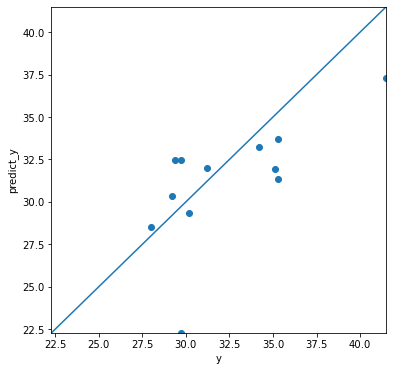

In [83]:
# グラフエリアを設定し、散布図を描く。
plt.figure(figsize=(6, 6))
plt.scatter(Y_test, pred)

# yの最大値、最小値を計算する。
y_max = np.max(Y_test)
y_min = np.min(Y_test)

# predict_yの最大値、最小値を計算する。
predict_y_max = np.max(pred)
predict_y_min = np.min(pred)

# 全てのプロットが収まるようにするには、yとpredict_y両方のうち
# 最も小さい値、最も大きい値を縦軸横軸の範囲にすればいい。
axis_max = max(y_max, predict_y_max)
axis_min = min(y_min, predict_y_min)

plt.xlim(axis_min, axis_max)
plt.ylim(axis_min, axis_max)

plt.xlabel('y')
plt.ylabel('predict_y')
#y=predicted_yの直線を引く。
plt.plot([axis_min, axis_max], [axis_min, axis_max])

plt.show()

In [34]:
print(nba_df)

    rank                 Player   Age     GP   MIN   FG%    3P%   FT%  ORB  \
0      1          Stephen Curry  31.0  112.0  37.8  40.8  40.10  90.6  0.8   
1      2     Russell Westbrook_  32.0  104.0  37.5  41.1  29.80  83.5  1.8   
2      3             Chris Paul  35.0  108.0  37.2  47.8  36.40  84.5  0.8   
3      4           James Harden  31.0  126.0  35.2  42.5  33.20  86.6  0.7   
4      5              John Wall  29.0   37.0  38.8  41.9  26.70  82.2  0.5   
5      6           LeBron James  35.0  260.0  41.6  49.6  33.50  74.1  1.5   
6      7           Kevin Durant  32.0  139.0  40.3  47.5  35.20  86.4  0.8   
7      8          Blake Griffin  31.0   53.0  35.3  49.0   3.61  73.0  2.2   
8      9             Kyle Lowry  33.0   86.0  34.7  41.9  34.50  79.2  0.8   
9     10            Paul George  30.0   88.0  38.7  42.1  35.90  82.1  1.0   
10    11          Klay Thompson  29.0  123.0  37.2  44.2  41.50  84.1  0.6   
11    12           Kemba Walker  30.0   25.0  37.7  42.0  33.10 

In [88]:
#非線形回帰を行うためのライブラリ
from sklearn.preprocessing import PolynomialFeatures
# 2次（までの）変数を作成するインスタンス
quadratic = PolynomialFeatures(degree = 2)
# 3次（までの）変数を作成するインスタンス
cubic = PolynomialFeatures(degree = 3)
# 変数作成
X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

In [89]:
#2次回帰
model = sm.OLS(Y,X_quad)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Income   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     6.231
Date:                Sun, 22 Nov 2020   Prob (F-statistic):            0.00224
Time:                        18:00:40   Log-Likelihood:                -60.387
No. Observations:                  38   AIC:                             176.8
Df Residuals:                      10   BIC:                             222.6
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1046.2221    491.201     -2.130      0.059   -2140.687      48.243
x1            -0.9671      0.762     -1.269      0.233      -2.665       0.730
x2            40.9925     14.386      2.849      0.017       8.938      73.047
x3            10.1347      6.827      1.484      0.169      -5.078      25.347
x4          -107.7760     64.348     -1.675      0.125    -251.152      35.600
x5             1.7715     74.351      0.024      0.981    -163.893     167.436
x6           -21.8591     13.479     -1.622      0.136     -51.893       8.174
x7            -0.0006      0.001     -0.869      0.405      -0.002       0.001
x8             0.0272      0.012      2.345      0.041       0.001       0.053
x9            -0.0008      0.007     -0.107      0.917      -0.017       0.015
x10           -0.2027      0.106     -1.911      0.085      -0.439       0.034
x11            0.0006      0.055      0.011      0.992      -0.123       0.124
x12            0.0031      0.014      0.222      0.829      -0.028       0.035
x13           -0.3054      0.134     -2.273      0.046      -0.605      -0.006
x14           -0.2521      0.114     -2.213      0.051      -0.506       0.002
x15            1.1389      1.399      0.814      0.434      -1.978       4.256
x16           -1.0944      0.690     -1.587      0.144      -2.631       0.442
x17            0.3921      0.168      2.330      0.042       0.017       0.767
x18           -0.0108      0.020     -0.542      0.600      -0.055       0.034
x19            0.9714      0.673      1.444      0.179      -0.528       2.470
x20            0.4149      0.764      0.543      0.599      -1.288       2.117
x21            0.0849      0.122      0.698      0.501      -0.186       0.356
x22           -3.1825      3.352     -0.949      0.365     -10.652       4.287
x23            0.8910      2.904      0.307      0.765      -5.580       7.362
x24           -0.4409      0.878     -0.502      0.627      -2.398       1.516
x25           -0.5092      2.903     -0.175      0.864      -6.976       5.958
x26            0.9894      0.894      1.107      0.294      -1.002       2.981
x27           -0.1383      0.106     -1.300      0.223      -0.375       0.099
==============================================================================
Omnibus:                        4.588   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.101   Jarque-Bera (JB):                3.271
Skew:                          -0.527   Prob(JB):                        0.195
Kurtosis:                       3.978   Cond. No.                     2.12e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+07. This might i

In [90]:
#３次回帰
model = sm.OLS(Y,X_cubic)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Income   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Sun, 22 Nov 2020   Prob (F-statistic):                nan
Time:                        18:00:41   Log-Likelihood:                 927.28
No. Observations:                  38   AIC:                            -1779.
Df Residuals:                       0   BIC:                            -1716.
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.307e-05        inf         -0        nan         nan         nan
x1             0.0006        inf          0        nan         nan         nan
x2            -0.0005        inf         -0        nan         nan         nan
x3            -0.0012        inf         -0        nan         nan         nan
x4             0.0001        inf          0        nan         nan         nan
x5            -0.0003        inf         -0        nan         nan         nan
x6            -0.0008        inf         -0        nan         nan         nan
x7            -0.0004        inf         -0        nan         nan         nan
x8             0.0467        inf          0        nan         nan         nan
x9             0.0015        inf          0        nan         nan         nan
x10            0.0050        inf          0        nan         nan         nan
x11           -0.0100        inf         -0        nan         nan         nan
x12           -0.0152        inf         -0        nan         nan         nan
x13            0.0105        inf          0        nan         nan         nan
x14            0.0014        inf          0        nan         nan         nan
x15            0.0033        inf          0        nan         nan         nan
x16           -0.0056        inf         -0        nan         nan         nan
x17           -0.0081        inf         -0        nan         nan         nan
x18           -0.0016        inf         -0        nan         nan         nan
x19            0.0040        inf          0        nan         nan         nan
x20           -0.0118        inf         -0        nan         nan         nan
x21           -0.0227        inf         -0        nan         nan         nan
x22         -5.34e-05        inf         -0        nan         nan         nan
x23           -0.0003        inf         -0        nan         nan         nan
x24            0.0006        inf          0        nan         nan         nan
x25           -0.0003        inf         -0        nan         nan         nan
x26           -0.0033        inf         -0        nan         nan         nan
x27           -0.0077        inf         -0        nan         nan         nan
x28         4.046e-06        inf          0        nan         nan         nan
x29        -5.548e-05        inf         -0        nan         nan         nan
x30           -0.0002        inf         -0        nan         nan         nan
x31           -0.0011        inf         -0        nan         nan         nan
x32           -0.0032        inf         -0        nan         nan         nan
x33            0.0012        inf          0        nan         nan         nan
x34            0.0015        inf          0        nan         nan         nan
x35            0.0011        inf          0        nan         nan         nan
x3

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ffd819cfeb0>,
      dtype=object)

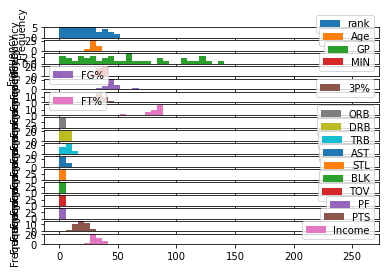

In [38]:
#外れ値を見るための箱ひげ図
nba_df.plot(kind='hist', bins=50, subplots=True)

In [39]:
print(nba_df)

    rank                 Player   Age     GP   MIN   FG%    3P%   FT%  ORB  \
0      1          Stephen Curry  31.0  112.0  37.8  40.8  40.10  90.6  0.8   
1      2     Russell Westbrook_  32.0  104.0  37.5  41.1  29.80  83.5  1.8   
2      3             Chris Paul  35.0  108.0  37.2  47.8  36.40  84.5  0.8   
3      4           James Harden  31.0  126.0  35.2  42.5  33.20  86.6  0.7   
4      5              John Wall  29.0   37.0  38.8  41.9  26.70  82.2  0.5   
5      6           LeBron James  35.0  260.0  41.6  49.6  33.50  74.1  1.5   
6      7           Kevin Durant  32.0  139.0  40.3  47.5  35.20  86.4  0.8   
7      8          Blake Griffin  31.0   53.0  35.3  49.0   3.61  73.0  2.2   
8      9             Kyle Lowry  33.0   86.0  34.7  41.9  34.50  79.2  0.8   
9     10            Paul George  30.0   88.0  38.7  42.1  35.90  82.1  1.0   
10    11          Klay Thompson  29.0  123.0  37.2  44.2  41.50  84.1  0.6   
11    12           Kemba Walker  30.0   25.0  37.7  42.0  33.10 

In [40]:
nba_df_index=nba_df.set_index('rank')
print(nba_df_index)

                     Player   Age     GP   MIN   FG%    3P%   FT%  ORB   DRB  \
rank                                                                           
1             Stephen Curry  31.0  112.0  37.8  40.8  40.10  90.6  0.8   4.6   
2        Russell Westbrook_  32.0  104.0  37.5  41.1  29.80  83.5  1.8   5.2   
3                Chris Paul  35.0  108.0  37.2  47.8  36.40  84.5  0.8   4.4   
4              James Harden  31.0  126.0  35.2  42.5  33.20  86.6  0.7   4.7   
5                 John Wall  29.0   37.0  38.8  41.9  26.70  82.2  0.5   3.8   
6              LeBron James  35.0  260.0  41.6  49.6  33.50  74.1  1.5   7.5   
7              Kevin Durant  32.0  139.0  40.3  47.5  35.20  86.4  0.8   6.9   
8             Blake Griffin  31.0   53.0  35.3  49.0   3.61  73.0  2.2   6.3   
9                Kyle Lowry  33.0   86.0  34.7  41.9  34.50  79.2  0.8   3.5   
10              Paul George  30.0   88.0  38.7  42.1  35.90  82.1  1.0   6.1   
11            Klay Thompson  29.0  123.0

In [41]:
#外れ値の処理
nba_df_processed=nba_df_index.drop([8,36,42,45], axis='index')
print(nba_df_processed)

                     Player   Age     GP   MIN   FG%   3P%   FT%  ORB   DRB  \
rank                                                                          
1             Stephen Curry  31.0  112.0  37.8  40.8  40.1  90.6  0.8   4.6   
2        Russell Westbrook_  32.0  104.0  37.5  41.1  29.8  83.5  1.8   5.2   
3                Chris Paul  35.0  108.0  37.2  47.8  36.4  84.5  0.8   4.4   
4              James Harden  31.0  126.0  35.2  42.5  33.2  86.6  0.7   4.7   
5                 John Wall  29.0   37.0  38.8  41.9  26.7  82.2  0.5   3.8   
6              LeBron James  35.0  260.0  41.6  49.6  33.5  74.1  1.5   7.5   
7              Kevin Durant  32.0  139.0  40.3  47.5  35.2  86.4  0.8   6.9   
9                Kyle Lowry  33.0   86.0  34.7  41.9  34.5  79.2  0.8   3.5   
10              Paul George  30.0   88.0  38.7  42.1  35.9  82.1  1.0   6.1   
11            Klay Thompson  29.0  123.0  37.2  44.2  41.5  84.1  0.6   3.4   
12             Kemba Walker  30.0   25.0  37.7  42.0

In [46]:
#必要な説明変数だけに絞ってXに代入
X_processed = nba_df_processed.drop(["Income","Player"],axis=1)
#目的変数だけをYに代入
Y_processed = nba_df_processed["Income"]
#外れ値処理後の回帰分析
model = sm.OLS(Y_processed,X_processed)
result = model.fit()
result.summary()

In [47]:
#外れ値処理後の回帰分析
model = sm.OLS(Y_processed,X_processed)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Income   R-squared (uncentered):                   0.994
Model:                            OLS   Adj. R-squared (uncentered):              0.991
Method:                 Least Squares   F-statistic:                              271.1
Date:                Sun, 22 Nov 2020   Prob (F-statistic):                    3.22e-22
Time:                        16:14:50   Log-Likelihood:                         -88.843
No. Observations:                  38   AIC:                                      207.7
Df Residuals:                      23   BIC:                                      232.3
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Age           -0.1875      0.305     -0.614      0.545      -0.819       0.444
GP             0.0586      0.019      3.107      0.005       0.020       0.098
MIN           -0.0939      0.281     -0.334      0.742      -0.676       0.488
FG%            0.4940      0.221      2.238      0.035       0.037       0.950
3P%           -0.1800      0.156     -1.152      0.261      -0.503       0.143
FT%            0.3321      0.109      3.034      0.006       0.106       0.559
ORB          -11.1629     23.657     -0.472      0.641     -60.102      37.776
DRB           -9.5381     22.878     -0.417      0.681     -56.865      37.789
TRB            9.4831     23.028      0.412      0.684     -38.155      57.121
AST            0.6006      0.526      1.143      0.265      -0.487       1.688
STL           -2.5360      1.881     -1.348      0.191      -6.428       1.356
BLK           -1.9257      1.968     -0.979      0.338      -5.996       2.145
TOV            3.5933      1.942      1.850      0.077      -0.425       7.612
PF            -0.4095      1.459     -0.281      0.781      -3.427       2.608
PTS           -0.3989      0.239     -1.667      0.109      -0.894       0.096
==============================================================================
Omnibus:                        1.252   Durbin-Watson:                   1.858
Prob(Omnibus):                  0.535   Jarque-Bera (JB):                1.241
Skew:                          -0.354   Prob(JB):                        0.538
Kurtosis:                       2.468   Cond. No.                     1.02e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""